In [162]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [163]:
import os
wd = os.getcwd()
wd

'C:\\Users\\Nils\\Documents\\KIT-TVWL\\Master\\SS 18\\KD Seminar\\Git\\mlp'

**Read in financial Data**

In [450]:
fin_data = pd.read_csv("../finance_data/data/aggregated_returns.csv", index_col=["Timestamp"], parse_dates=True)
fin_data = fin_data.drop(columns=["Unnamed: 0"])
fin_data = fin_data.sort_index()
fin_data.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2010-06-29,0.022990,-0.031939,-0.005759,0.002937,-0.005449,0.002515,0.002350,0.018279,0.003982,-0.004127,0.026947
2010-06-30,0.010390,-0.023302,0.021987,-0.013874,0.009283,0.081723,0.051293,0.012200,0.027190,0.047668,0.019717
2010-07-01,-0.001305,-0.010501,-0.004610,0.011670,0.026683,0.134312,0.018751,0.006217,0.001368,0.008280,0.034667
2010-07-02,0.000000,0.009063,0.009995,-0.005852,0.001240,0.175470,-0.012851,-0.006820,0.011355,-0.005921,0.010506
2010-07-06,0.007772,-0.018515,-0.007211,-0.035820,-0.006629,0.019430,-0.023836,-0.039568,0.001796,-0.019048,0.002878


In [451]:
fin_data.shift(-1)[0:4]

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2010-06-29,0.010390,-0.023302,0.021987,-0.013874,0.009283,0.081723,0.051293,0.012200,0.027190,0.047668,0.019717
2010-06-30,-0.001305,-0.010501,-0.004610,0.011670,0.026683,0.134312,0.018751,0.006217,0.001368,0.008280,0.034667
2010-07-01,0.000000,0.009063,0.009995,-0.005852,0.001240,0.175470,-0.012851,-0.006820,0.011355,-0.005921,0.010506
2010-07-02,0.007772,-0.018515,-0.007211,-0.035820,-0.006629,0.019430,-0.023836,-0.039568,0.001796,-0.019048,0.002878


In [452]:
fin_data_class = fin_data.applymap(lambda x: 0 if x < 0 else 1)
fin_data_class = fin_data_class.shift(-1)

In [453]:
fin_data_class.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2010-06-29,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-06-30,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-07-01,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2010-07-02,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2010-07-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [454]:
val_count = {0: 0, 1: 0}
for idx, row in fin_data_class.iterrows():
    tmp = row.value_counts()
    if 0 in tmp:
        val_count[0] = val_count[0]  + tmp[0]
    if 1 in tmp:
        val_count[1] = val_count[1]  + tmp[1]
val_count["0_relative"] = round((val_count[0] / (val_count[0] + val_count[1])) * 100, 2) 
val_count["1_relative"] = round((val_count[1] / (val_count[0] + val_count[1])) * 100, 2) 
val_count

{0: 10520,
 1: 10259,
 '0_relative': 50.630000000000003,
 '1_relative': 49.369999999999997}

**Read in training Data**

In [455]:
path_to_data = "../doc2vec/data/article_vectors_2016-05-09-2018-06-18.json"

In [456]:
data = pd.read_json(path_to_data)

In [457]:
data = data.applymap(lambda x: np.array(x))

In [458]:
data.head(2)

,Samsung,BASF,Apple,Tesla,Airbus,Bayer,BMW,Telefonica,Google,Allianz,Total
2016-05-09,"[[-0.2783023417, 1.64141333103, -0.20274081826...","[[0.224157735705, -1.5261811018, -1.2688174247...","[[-0.722135663033, -1.72117328644, -1.80950939...","[[0.423787772655, -0.74573212862, 0.9875811934...","[[0.148221626878, 1.14429688454, 0.40630602836...","[[-1.70463657379, -1.86712861061, 0.5173683166...","[[0.114925034344, 2.18565130234, 0.77067273855...","[[5.12693452835, 0.508681952953, -1.3149539232...","[[0.143301770091, -2.48351478577, 0.5807461142...","[[1.78534734249, -0.00683000870049, -0.1249627...","[[-4.92617940903, -2.99923372269, -3.530821084..."
2016-05-10,"[[-0.674747109413, 1.27446496487, 0.4876792728...","[[-1.70561218262, -1.01267302036, -0.294923424...","[[-1.54350924492, -4.86762571335, 2.2554593086...","[[-2.1006333828, 1.75756955147, -0.47064906358...","[[-1.10437369347, -1.62711632252, -0.592201709...","[[0.421989887953, -0.531891644001, -1.12830972...","[[0.134391367435, 0.00158115802333, 1.10614168...","[[1.03278207779, 3.52327179909, 1.57724928856,...","[[-2.00603866577, -1.06945300102, -1.689569711...","[[-0.55547773838, -0.371566027403, 3.171932458...","[[-0.825915932655, -1.2935500145, -1.318230867..."


In [459]:
fin_data_dates = fin_data.index.date.tolist()
data_dates = data.index.date.tolist()

In [460]:
available_dates = list(set(fin_data_dates).intersection(data_dates))

fin_data_class = fin_data_class[fin_data_class.index.isin(available_dates)]
fin_data_train = fin_data[fin_data.index.isin(available_dates)]
data = data[data.index.isin(available_dates)]

In [461]:
val_count = {0: 0, 1: 0}
for idx, row in fin_data_class.iterrows():
    tmp = row.value_counts()
    if 0 in tmp:
        val_count[0] = val_count[0]  + tmp[0]
    if 1 in tmp:
        val_count[1] = val_count[1]  + tmp[1]
val_count["0_relative"] = round((val_count[0] / (val_count[0] + val_count[1])) * 100, 2) 
val_count["1_relative"] = round((val_count[1] / (val_count[0] + val_count[1])) * 100, 2) 
val_count

{0: 2793,
 1: 2652,
 '0_relative': 51.289999999999999,
 '1_relative': 48.710000000000001}

In [462]:
len(available_dates)

495

In [463]:
fin_data_train_vals = fin_data_train.values#.reshape(fin_data_train.shape[0], 1, fin_data_train.shape[1])
fin_data_train_vals.shape

(495, 11)

In [464]:
data.shape

(495, 11)

In [465]:
X = []

In [466]:
for idx, row in data.iterrows():
    print(idx.date())
    tmp = data.loc[idx].values

    tmp_data = []
    for i,r in enumerate(tmp):
        #print(type(r))
        #print(type(r))
        if hasattr(r, 'shape') and r.shape[0] :
            #print(type(r))
            #print("HEY")
            r = np.array(r)
            #if r.shape[0] != 50:
            #    print(r.shape)
            p = 50-r.shape[0]
            r = np.pad(r, ((0,p),(0,0)), "constant")
            #print(r)
        else:
            r = np.zeros((50,100))
        tmp_data.append(r)
    tmp_data = np.array(tmp_data)
    tmp_data = tmp_data.reshape((50,100,11))
    #print(tmp_data)
    X.append(tmp_data)
    #data_dict[idx.date()] = tmp
    

2016-05-09
2016-05-10
2016-05-11
2016-05-12
2016-05-13
2016-05-17
2016-05-18
2016-05-19
2016-05-20
2016-05-23
2016-05-24
2016-05-25
2016-05-26
2016-05-27
2016-05-31
2016-06-01
2016-06-02
2016-06-03
2016-06-07
2016-06-08
2016-06-09
2016-06-10
2016-06-13
2016-06-14
2016-06-15
2016-06-16
2016-06-17
2016-06-20
2016-06-21
2016-06-22
2016-06-23
2016-06-24
2016-06-27
2016-06-28
2016-06-29
2016-06-30
2016-07-01
2016-07-05
2016-07-06
2016-07-07
2016-07-08
2016-07-11
2016-07-12
2016-07-13
2016-07-14
2016-07-15
2016-07-18
2016-07-19
2016-07-20
2016-07-21
2016-07-22
2016-07-25
2016-07-26
2016-07-27
2016-07-28
2016-07-29
2016-08-01
2016-08-02
2016-08-03
2016-08-04
2016-08-05
2016-08-08
2016-08-09
2016-08-10
2016-08-11
2016-08-12
2016-08-16
2016-08-17
2016-08-18
2016-08-19
2016-08-22
2016-08-23
2016-08-24
2016-08-25
2016-08-26
2016-08-29
2016-08-30
2016-08-31
2016-09-01
2016-09-02
2016-09-06
2016-09-07
2016-09-08
2016-09-09
2016-09-12
2016-09-13
2016-09-19
2016-09-20
2016-09-21
2016-09-22
2016-09-23

In [467]:
#X = np.array(final_d)
X = np.array(X)
X.shape

(495, 50, 100, 11)

In [468]:
X[30][0][0]

array([ 0.42814672, -0.83220714, -0.49539551, -0.71838945,  0.15086618,
        0.70842946,  1.3875035 ,  0.1596328 ,  0.17833374, -0.29385453,
       -1.04801702])

In [469]:
Y

array([[ 1.,  0.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  0., ...,  0.,  1.,  1.],
       ..., 
       [ 1.,  0.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  0.],
       [ 1.,  1.,  1., ...,  0.,  1.,  0.]])

In [470]:
Y = fin_data_class.values
Y.shape

(495, 11)

**CNN**

In [471]:
from sklearn.model_selection import train_test_split

from keras import backend as K
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, GaussianNoise
from keras.layers import Conv1D, Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D

from keras import regularizers

In [472]:
x_train, x_val, y_train, y_val = train_test_split(X[:250], Y[:250], test_size=0.25, random_state=21)

In [473]:
x_train.shape

(187, 50, 100, 11)

In [424]:
num_classes=11
num_filters= 100
filter_sizes = [3,4,5]
embedding_dim = x_train.shape[2]
sequence_length = x_train.shape[1] 

In [425]:
sequence_length

50

In [426]:
def custom_tanh(x):
    return (K.tanh((2/3)*x) * 1.5)#1.7159) #(2/3)

def custom_sigmoid(x):
    return (K.sigmoid((3/4) * x) )#* 1.7159)

In [427]:
def make_first_model():
    model = Sequential()
    model.add(GaussianNoise(stddev=1,input_shape=x_train.shape[1:]))
    model.add(Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid',input_shape=x_train.shape[1:], 
                     data_format="channels_last", activation="relu")) #relu
    #, kernel_regularizer=regularizers.l2(0.01)
    #model.add(Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='same', activation="relu"))

    model.add(BatchNormalization())
    #model.add(MaxPooling2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), strides=(1,1))) #data_format="channels_last"
    model.add(AveragePooling2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))) 
    model.add(BatchNormalization())
    #model.add(Conv2D(num_filters, kernel_size=(1,embedding_dim), strides=(1,1), activation="relu"))
    #model.add(MaxPooling2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), strides=(1,1)))
    #model.add(Activation('relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.5))
    #model.add(GaussianNoise(stddev=3))

    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation=custom_tanh)) #custom_tanh "relu"
    #model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation="relu"))
    model.add(Dense(512, activation="relu"))
    model.add(Dense(num_classes, activation=custom_sigmoid)) #"sigmoid"  custom_sigmoid 
    
    adam_opt = keras.optimizers.adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0)

    model.compile(loss='binary_crossentropy', 
              optimizer=adam_opt,#opt,"Adam"
              metrics=['binary_accuracy'])
    
    return model

In [428]:
first_model = make_first_model()
first_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise_11 (GaussianN (None, 50, 100, 11)       0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 48, 1, 100)        330100    
_________________________________________________________________
batch_normalization_53 (Batc (None, 48, 1, 100)        400       
_________________________________________________________________
average_pooling2d_13 (Averag (None, 1, 1, 100)         0         
_________________________________________________________________
batch_normalization_54 (Batc (None, 1, 1, 100)         400       
_________________________________________________________________
dropout_91 (Dropout)         (None, 1, 1, 100)         0         
_________________________________________________________________
flatten_41 (Flatten)         (None, 100)               0         
__________

In [429]:
history = first_model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=100, batch_size=10, verbose=2)

Train on 187 samples, validate on 63 samples
Epoch 1/100
 - 9s - loss: 0.7022 - binary_accuracy: 0.5177 - val_loss: 0.6925 - val_binary_accuracy: 0.5123
Epoch 2/100
 - 2s - loss: 0.6921 - binary_accuracy: 0.5416 - val_loss: 0.6928 - val_binary_accuracy: 0.4949
Epoch 3/100
 - 2s - loss: 0.6842 - binary_accuracy: 0.5586 - val_loss: 0.6937 - val_binary_accuracy: 0.4834
Epoch 4/100
 - 2s - loss: 0.6791 - binary_accuracy: 0.5683 - val_loss: 0.6941 - val_binary_accuracy: 0.4892
Epoch 5/100
 - 2s - loss: 0.6695 - binary_accuracy: 0.5882 - val_loss: 0.6949 - val_binary_accuracy: 0.4906
Epoch 6/100
 - 2s - loss: 0.6668 - binary_accuracy: 0.5946 - val_loss: 0.6952 - val_binary_accuracy: 0.4892
Epoch 7/100
 - 2s - loss: 0.6594 - binary_accuracy: 0.6096 - val_loss: 0.6953 - val_binary_accuracy: 0.5007
Epoch 8/100
 - 2s - loss: 0.6501 - binary_accuracy: 0.6232 - val_loss: 0.6958 - val_binary_accuracy: 0.5123
Epoch 9/100
 - 2s - loss: 0.6367 - binary_accuracy: 0.6451 - val_loss: 0.6976 - val_binary_

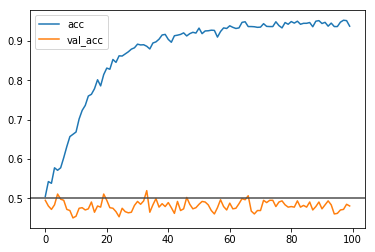

In [353]:
plt.plot(history.history["binary_accuracy"], label="acc")
plt.plot(history.history["val_binary_accuracy"], label="val_acc")
plt.axhline(0.5, c=".3")
plt.legend()
plt.show()

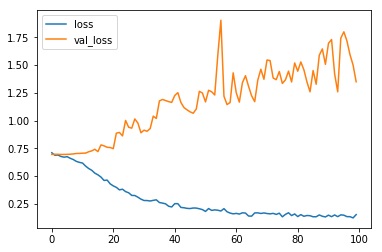

In [354]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [370]:
preds = first_model.predict(X)


In [371]:
df_predictions = pd.DataFrame(preds, columns=fin_data_class.columns, index = fin_data_class.index)#[1 if t > 0.5 else 0 for t in Y[1]]
df_predictions.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2016-05-09,0.004522,0.998990,0.926196,0.003388,0.011687,0.991988,0.027285,0.998386,0.000259,0.998609,0.011102
2016-05-10,0.998279,0.000983,0.000130,0.000158,0.002821,0.994658,0.000640,0.000055,0.000316,0.000046,0.106450
2016-05-11,0.996490,0.000964,0.994090,0.000189,0.997957,0.011234,0.999984,0.968550,0.995825,0.999748,0.999380
2016-05-12,0.997232,0.988041,0.975898,0.003500,0.999291,0.995858,0.999575,0.998535,0.997499,0.998646,0.999762
2016-05-13,0.995576,0.997617,0.001974,0.995783,0.009435,0.000441,0.999565,0.001948,0.007093,0.995542,0.997987


In [372]:
def try_cuts(df, cut_count, subset=None):
    cuts = np.linspace(0,1,cut_count)
    accs = []
    for c in cuts:
        df_tmp = df.applymap(lambda x: 1 if x > c else 0)
        if subset:
            df_tmp = fin_data_class[subset].rsub(df_tmp)
        else:
            df_tmp = fin_data_class.rsub(df_tmp)
        df_tmp["error_sum"] = df_tmp.apply(lambda x: np.sum(abs(x)), axis=1)
        
        total_returns = df_tmp.shape[0] * df_tmp.shape[1]
        error_sum = df_tmp["error_sum"].sum()
        accuracy = (total_returns - error_sum) / total_returns
        
        accs.append(accuracy)
    return accs, cuts

In [373]:
accs, cuts = try_cuts(df_predictions, 30) #subset=slice(250, -1)

In [374]:
max_index = accs.index(max(accs))
cuts[max_index]

0.7931034482758621

Text(0,0.5,'Accuracy')

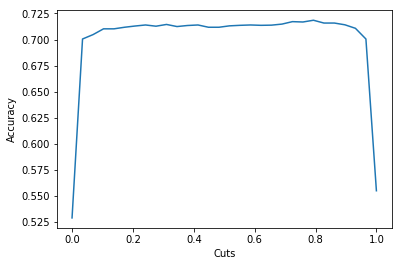

In [375]:
plt.plot(cuts, accs)
plt.xlabel("Cuts")
plt.ylabel("Accuracy")

In [278]:
df_predictions = df_predictions.applymap(lambda x: 1 if x > cuts[max_index] else 0)
df_predictions.to_csv("./predictions/predictions_frst_model_non_training_data.csv")
df_predictions.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2017-05-30,1,1,1,1,1,1,1,1,1,0,0
2017-05-31,1,1,1,1,1,0,1,1,1,0,1
2017-06-01,1,1,1,1,1,1,1,1,1,0,1
2017-06-02,1,1,1,0,1,1,1,0,1,1,0
2017-06-05,1,1,1,0,1,1,1,1,1,0,0


In [279]:
fin_data_class.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2016-05-09,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2016-05-10,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2016-05-11,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2016-05-12,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2016-05-13,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [55]:
df_pred_errors = fin_data_class.rsub(df_predictions)

In [56]:
def count_fp(x):
    company_list = fin_data_class.columns
    tmp = x[company_list]
    
    if 1 in tmp.value_counts():
        return tmp.value_counts()[1]
    else:
        return 0
    
def count_fn(x):
    company_list = fin_data_class.columns
    tmp = x[company_list]
    
    if -1 in tmp.value_counts():
        return tmp.value_counts()[-1]
    else:
        return 0

In [59]:
df_pred_errors["error_sum"] = df_pred_errors.apply(lambda x: np.sum(abs(x)), axis=1)
df_pred_errors["fale_pos_sum"] = df_pred_errors.apply(count_fp, axis=1)
df_pred_errors["fale_neg_sum"] = df_pred_errors.apply(count_fn, axis=1)

In [60]:
df_pred_errors["fale_pos_sum"].sum()

659

In [61]:
df_pred_errors["fale_neg_sum"].sum()

972

In [62]:
df_pred_errors.iloc[:200].shape[0] * (df_pred_errors.iloc[:200].shape[1] - 2)

2400

In [63]:
df_pred_errors.iloc[:200].error_sum.sum()

1428

In [64]:
total_returns = df_pred_errors.shape[0] * (df_pred_errors.shape[1] - 2)

In [65]:
error_sum = df_pred_errors["error_sum"].sum()

In [66]:
accur = (total_returns - error_sum) / total_returns
accur

0.45084175084175082

In [67]:
preds.shape

(495, 11)

In [68]:
Y.shape

(495, 11)

In [280]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [348]:
precision, recall, thresholds = precision_recall_curve(Y.ravel(), preds2.ravel())

Text(0,0.5,'Precision')

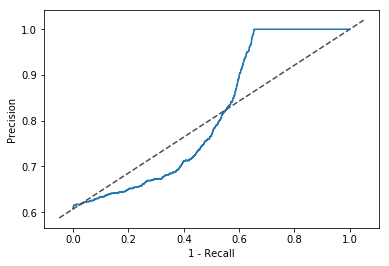

In [349]:
plt.plot((1 - recall), precision)
#plt.step((1-recall), thresholds.add(1))
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.xlabel("1 - Recall")
plt.ylabel("Precision")

In [286]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y[250:].ravel(), preds.ravel())

In [287]:
auc_keras = auc(fpr_keras, tpr_keras)

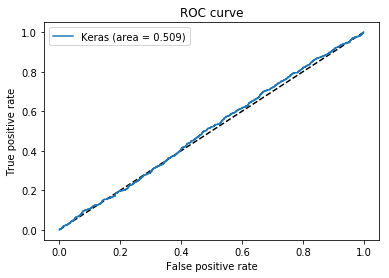

In [288]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Second Model

In [289]:
from keras.layers import Dense, Input, Flatten, Reshape, concatenate, Dropout, Concatenate, Activation
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Embedding, MaxPool2D
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.models import Model
from keras import optimizers
from keras import regularizers

from keras.optimizers import Adam

In [290]:
def _bn_relu(input):
    """Helper to build a BN -> relu block
    """
    norm = BatchNormalization(axis=3)(input)
    return Activation("relu")(norm)

In [449]:
inputs = Input(shape=x_train.shape[1:], dtype="float64")#, dtype='int32'[1:]

return_inputs = Input(shape=fin_data_train_vals.shape[1:])#, dtype="float64")

#reshape = Reshape((x_train[0],sequence_length,embedding_dim,11))(x_train)
dense_returns = Dense(100, activation="relu")(return_inputs)
conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', 
                kernel_initializer='normal')(inputs) #, activation='relu'
batch_norm_0 = _bn_relu(conv_0)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', 
                kernel_initializer='normal')(inputs) #, activation='relu'
batch_norm_1 = _bn_relu(conv_1)#atchNormalization()(conv_1)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', 
                kernel_initializer='normal')(inputs) #, activation='relu'
batch_norm_2 = _bn_relu(conv_2) #BatchNormalization()(conv_2)



maxpool_0 = MaxPool2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(batch_norm_0)#(conv_0)
dropout_0 = Dropout(0.4)(maxpool_0)
maxpool_1 = MaxPool2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(batch_norm_1)#(conv_1)
dropout_1 = Dropout(0.4)(maxpool_1)
maxpool_2 = MaxPool2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(batch_norm_2)#(conv_2)
dropout_2 = Dropout(0.4)(maxpool_2)

concatenated_tensor = concatenate([dropout_0, dropout_1, dropout_2]) #(axis=1) ([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
flatten_with_returns = concatenate([flatten, dense_returns])
#flatten_2 = Flatten()(flatten_with_returns)
hidden_layer = Dense(256, activation="relu")(flatten_with_returns) #flatten
#flatten_with_returns = concatenate([hidden_layer, dense_returns])
dropout_3 = Dropout(0.4)(hidden_layer)
output = Dense(units=11, activation=custom_sigmoid)(dropout_3)

# this creates a model that includes
model = Model(inputs=[inputs, return_inputs], outputs=output)

checkpoint = ModelCheckpoint('weights.{epoch:03d}-{val_acc:.4f}.hdf5', monitor='val_acc', verbose=2, 
                             save_best_only=True, mode='auto')
tensorboard = TensorBoard(log_dir='./logs/run1', histogram_freq=1, write_graph=True, write_images=False)  

adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
print("Traning Model...")
model.summary()

Traning Model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_75 (InputLayer)           (None, 50, 100, 11)  0                                            
__________________________________________________________________________________________________
conv2d_160 (Conv2D)             (None, 48, 1, 100)   330100      input_75[0][0]                   
__________________________________________________________________________________________________
conv2d_161 (Conv2D)             (None, 47, 1, 100)   440100      input_75[0][0]                   
__________________________________________________________________________________________________
conv2d_162 (Conv2D)             (None, 46, 1, 100)   550100      input_75[0][0]                   
____________________________________________________________________________________________

In [296]:
model2 = model.fit(x_train, y_train, batch_size=10, epochs=100, verbose=2, callbacks=[checkpoint], #tensorboard
                   validation_data=(x_val, y_val)) # starts training

Train on 187 samples, validate on 63 samples
Epoch 1/100
Epoch 00001: val_acc improved from -inf to 0.47619, saving model to weights.001-0.4762.hdf5
 - 12s - loss: 1.0766 - acc: 0.4973 - val_loss: 0.9202 - val_acc: 0.4762
Epoch 2/100
Epoch 00002: val_acc improved from 0.47619 to 0.47763, saving model to weights.002-0.4776.hdf5
 - 4s - loss: 0.9909 - acc: 0.5017 - val_loss: 0.8609 - val_acc: 0.4776
Epoch 3/100
Epoch 00003: val_acc improved from 0.47763 to 0.49062, saving model to weights.003-0.4906.hdf5
 - 5s - loss: 0.9361 - acc: 0.5270 - val_loss: 0.7883 - val_acc: 0.4906
Epoch 4/100
Epoch 00004: val_acc did not improve
 - 5s - loss: 0.8598 - acc: 0.5576 - val_loss: 0.7666 - val_acc: 0.4863
Epoch 5/100
Epoch 00005: val_acc did not improve
 - 5s - loss: 0.8572 - acc: 0.5343 - val_loss: 0.7657 - val_acc: 0.4747
Epoch 6/100
Epoch 00006: val_acc did not improve
 - 4s - loss: 0.8018 - acc: 0.5698 - val_loss: 0.7427 - val_acc: 0.4906
Epoch 7/100
Epoch 00007: val_acc did not improve
 - 5s - 

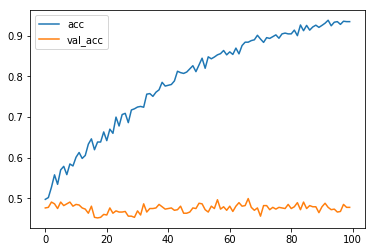

In [300]:
plt.plot(model2.history["acc"], label="acc")
plt.plot(model2.history["val_acc"], label="val_acc")
plt.legend()
plt.show()

In [386]:
preds2 = model.predict(X[:250])

In [387]:
df_predictions2 = pd.DataFrame(preds2, columns=fin_data_class.columns, index = fin_data_class[:250].index)#[1 if t > 0.5 else 0 for t in Y[1]]
df_predictions2.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2016-05-09,0.082968,0.988131,0.974869,0.045995,0.021217,0.992523,0.042165,0.983423,0.016496,0.951529,0.072928
2016-05-10,0.935074,0.005679,0.002382,0.014967,0.003024,0.985214,0.003467,0.009695,0.006397,0.003844,0.010754
2016-05-11,0.984138,0.044692,0.990391,0.035034,0.977570,0.068710,0.982048,0.960032,0.993171,0.997583,0.968854
2016-05-12,0.985585,0.990017,0.986334,0.023436,0.978357,0.989940,0.979857,0.990319,0.997643,0.998904,0.989016
2016-05-13,0.988239,0.974124,0.044530,0.955587,0.021175,0.050459,0.946577,0.021030,0.011349,0.978088,0.989453


Text(0,0.5,'Accuracy')

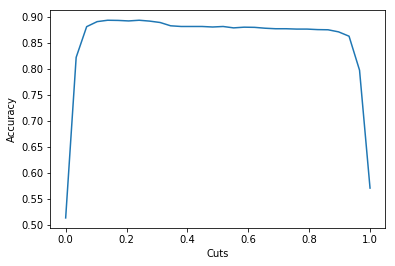

In [388]:
accs, cuts = try_cuts(df_predictions2, 30, subset=slice(0,250)) #, subset=slice(0,250)
plt.plot(cuts, accs)
plt.xlabel("Cuts")
plt.ylabel("Accuracy")

In [155]:
df_predictions2 = df_predictions.applymap(lambda x: 1 if x > 0.5 else 0) # cuts[max_index]
df_predictions2.to_csv("./predictions/predictions_scnd_model.csv")
df_predictions2.tail()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2016-05-13,1,0,1,0,1,0,1,0,0,1,0
2016-05-12,0,1,1,1,0,1,1,0,1,1,0
2016-05-11,0,1,1,0,0,0,1,0,0,1,0
2016-05-10,1,0,1,0,1,0,1,0,1,1,0
2016-05-09,0,0,0,0,0,0,1,0,0,0,0


In [154]:
fin_data_class.tail()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2016-05-13,1,0,1,0,1,0,1,0,1,1,0
2016-05-12,1,1,0,1,0,0,1,0,0,1,1
2016-05-11,1,1,1,0,1,1,1,1,1,1,1
2016-05-10,1,0,1,0,1,0,1,1,1,1,1
2016-05-09,1,0,0,0,0,1,0,0,0,0,0
